In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

model_name = "EleutherAI/gpt-neo-2.7B"  # Or GPT-NeoX-20B / Pythia-12B
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Example input
text = "The future of AI is"
inputs = tokenizer(text, return_tensors="pt")

# Get logits
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits  # Shape: [batch_size, seq_len, vocab_size]

print(logits.shape)  # [1, sequence_length, 50257]


torch.Size([1, 5, 50257])


# compare the probs between the teacher model and student model

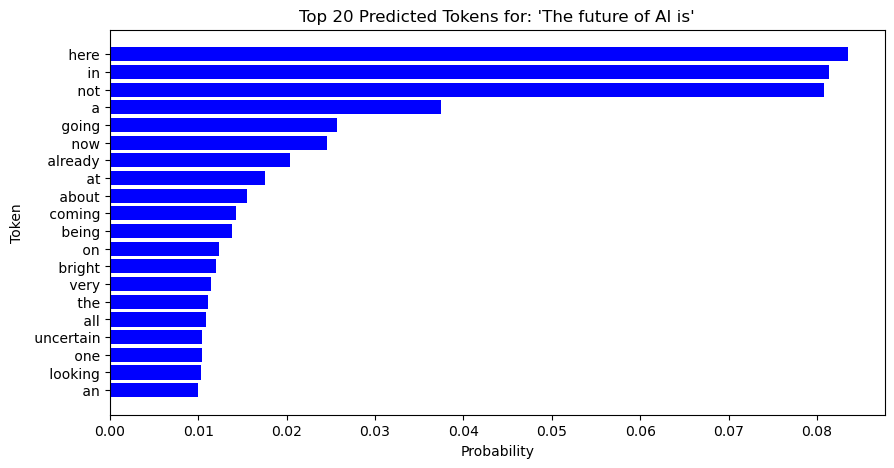

In [3]:
import torch
import matplotlib.pyplot as plt
from transformers import AutoModelForCausalLM, AutoTokenizer

# Load model and tokenizer
model_name = "EleutherAI/gpt-neo-2.7B"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name, device_map="auto", torch_dtype=torch.float16)

# Example input text
text = "The future of AI is"
inputs = tokenizer(text, return_tensors="pt").to("cuda")

# Get logits
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits  # Shape: [1, seq_len, vocab_size]

# Extract last token logits
last_token_logits = logits[0, -1, :]  # Shape: [vocab_size]

# Convert logits to probabilities using softmax
probs = torch.nn.functional.softmax(last_token_logits, dim=-1).cpu().numpy()

# Get top 20 tokens with highest probabilities
top_k = 20
top_probs, top_indices = torch.topk(torch.tensor(probs), top_k)
top_tokens = [tokenizer.decode([idx]) for idx in top_indices]

# Plot
plt.figure(figsize=(10, 5))
plt.barh(top_tokens[::-1], top_probs.numpy()[::-1], color='blue')
plt.xlabel("Probability")
plt.ylabel("Token")
plt.title(f"Top {top_k} Predicted Tokens for: '{text}'")
plt.show()


loading weights from pretrained gpt: gpt2


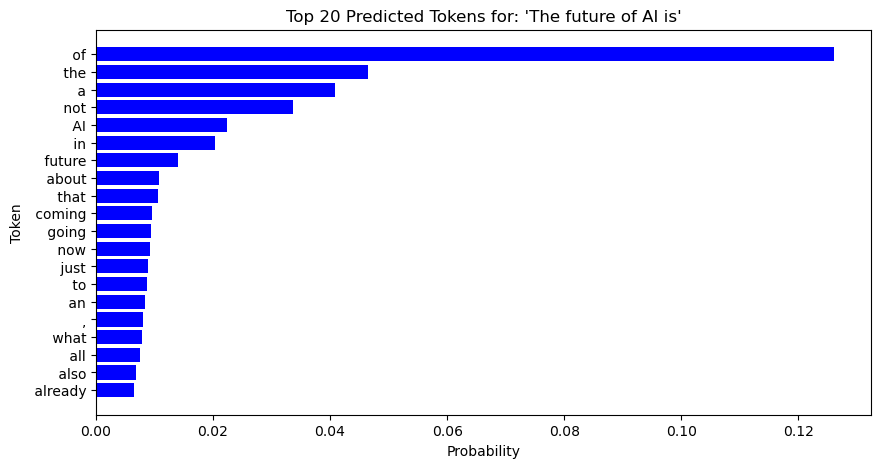

In [ ]:
from model import GPT
device = "cuda" if torch.cuda.is_available() else "cpu"
model = GPT.from_pretrained("gpt2")
model.to(device)

# Example input text
text = "The future of AI is"
inputs = tokenizer(text, return_tensors="pt").to("cuda")

# Get logits
with torch.no_grad():
    outputs = model(inputs["input_ids"])
    logits = outputs[0] # Shape: [1, seq_len, vocab_size]

# Extract last token logits
last_token_logits = logits[0, -1, :]  # Shape: [vocab_size]

# Convert logits to probabilities using softmax
probs = torch.nn.functional.softmax(last_token_logits, dim=-1).cpu().numpy()

# Get top 20 tokens with highest probabilities
top_k = 20
top_probs, top_indices = torch.topk(torch.tensor(probs), top_k)
top_tokens = [tokenizer.decode([idx]) for idx in top_indices]

# Plot
plt.figure(figsize=(10, 5))
plt.barh(top_tokens[::-1], top_probs.numpy()[::-1], color='blue')
plt.xlabel("Probability")
plt.ylabel("Token")
plt.title(f"Top {top_k} Predicted Tokens for: '{text}'")
plt.show()
